In [1]:
%pwd # print woriking directory
%cd yolov5/
!pip install -r requirements.txt

C:\Users\AI\Auto_Farming\yolov5


In [41]:
%pwd

'C:\\Users\\AI\\Auto_Farming'

# 동영상에서 한 프레임을 이미지 파일로 저장하기

- <font color=red>cv2.imwrite(“파일명.확장자”, 프레임이미지, 옵션)</font>
  - params=[cv2.IMWRITE_PNG_COMPRESSION, 0]) : 압축 하지 않는 PNG, 세 번째 파라미터는 압축률로 0~9까지 설정 가능 (0은 압축 없음)

In [82]:
import os
import glob
import cv2
import time
import matplotlib.pyplot as plt
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
save_img = 'C:/Users\AI/Auto_Farming/image/capture.png'
rs = []

while True :
    try:
        os.unlink(exp_path+"labels/capture.txt")
    except:
        print("")
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if not ret :
        break
    
    resize_frame = cv2.resize(frame, (1920, 1080))
    resize_frame = resize_frame[:,:1080]
    key = cv2.waitKey(33)
    cv2.imshow("test", resize_frame)
    cv2.imwrite(save_img, resize_frame,
               params=[cv2.IMWRITE_PNG_COMPRESSION, 0])
    rs1 = !python {path}detect4.py --weight {weight} --img 1088 --source {source} --save-txt --exist-ok --hide-conf --hide-labels
    rs.append(rs1)
    #for i in rs:
        #print(i)
#     break
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release() #비디오 객체 메모리에서 해제
cv2.destroyAllWindows() #창닫기

In [108]:
rs

[["\x1b\x1bdetect4: \x1bweights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\\AI/Auto_Farming/image/capture.png, data=yolov5\\data\\coco128.yaml, imgsz=[1080, 1080], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\\runs\\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1",
  'YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU',
  '',
  'Fusing layers... ',
  'YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs',
  'WARNING  --img-size [1080, 1080] must be multiple of max stride 32, updating to [1088, 1088]',
  'detect label list ',
  ' @@S 0.0 [1.0, 865.0, 23.0, 887.0] @@E ',
  '',
  'detect label list ',
  ' @@S 0.0 [989.0, 713.0, 1021.0, 799.0] @@E ',
 

In [107]:
for i in rs:
    for j in i :
        result = j[j.find("@@S"):j.find("@@E")][4:]
        print(result)








0.0 [1.0, 865.0, 23.0, 887.0] 


0.0 [989.0, 713.0, 1021.0, 799.0] 


0.0 [29.0, 153.0, 305.0, 273.0] 


0.0 [977.0, 121.0, 1075.0, 277.0] 












0.0 [989.0, 712.0, 1021.0, 800.0] 


0.0 [634.0, 990.0, 664.0, 1080.0] 


0.0 [711.0, 988.0, 736.0, 1080.0] 


0.0 [26.0, 148.0, 307.0, 273.0] 


0.0 [977.0, 121.0, 1075.0, 278.0] 












0.0 [152.0, 436.0, 496.0, 546.0] 


0.0 [23.0, 149.0, 308.0, 273.0] 


1.0 [230.0, 422.0, 257.0, 444.0] 


0.0 [978.0, 121.0, 1075.0, 280.0] 












0.0 [26.0, 153.0, 309.0, 272.0] 


0.0 [619.0, 987.0, 648.0, 1080.0] 


0.0 [990.0, 711.0, 1021.0, 800.0] 


0.0 [978.0, 123.0, 1075.0, 278.0] 












0.0 [721.0, 980.0, 752.0, 1080.0] 


0.0 [25.0, 151.0, 307.0, 272.0] 


0.0 [643.0, 986.0, 674.0, 1080.0] 


0.0 [990.0, 713.0, 1020.0, 800.0] 


0.0 [976.0, 121.0, 1078.0, 277.0] 












0.0 [1.0, 864.0, 24.0, 895.0] 


0.0 [25.0, 151.0, 309.0, 273.0] 


0.0 [978.0, 122.0, 1075.0, 279.0] 


0.0 [989.0, 711.0, 1020.0, 800.0] 







In [38]:
#좌표 save_txt
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"
with open(coordinate_path+"capture.txt", "r") as f:
    txt = f.readlines()  # 해당 파일 줄별 리스트 형태로 반환
print(txt)

['0 280 521 567 653\n', '0 0 755 93 784\n', '0 728 782 1021 869\n']


In [39]:
# ginseng, head 좌표 따로 모으는 반복문
ginseng_coordinate = []
head_coordinate = []
for i in txt:
    if i[0] == '0':
        ginseng_coordinate.append(i)
    if i[0] == '1':
        head_coordinate.append(i)
print(ginseng_coordinate)
print(head_coordinate)

['0 280 521 567 653\n', '0 0 755 93 784\n', '0 728 782 1021 869\n']
[]


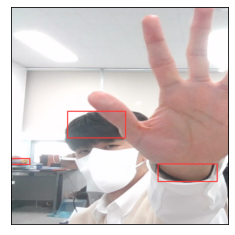

In [40]:
#디텍션 결과 이미지로
exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
img1 = cv2.imread(exp_path+'capture.png', cv2.IMREAD_COLOR)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.xticks([]); plt.yticks([])
plt.imshow(img1)

## ROI에 도형 그리기

- <font color=red>cv2.rectangle(배경이미지, 좌상단점좌표, 우하단점좌표, 색상, 선두께)</font> : 사각형 그리기
- <font color=red>cv2.circle(배경이미지, 중심좌표, 반지름, 색상, 선두께)</font> : 원 그리기

In [ ]:
path12 = "C:/Users/AI/Auto_Farming/image/capture.png"
img12 = cv2.imread(path12, cv2.IMREAD_COLOR)
img12 = cv2.cvtColor(img12, cv2.COLOR_BGR2RGB)
img12 = cv2.rectangle(img12, (587, 78),(621, 475),(0,255,0), 3)

x13 = (587+621)/2
y13 = (78+475)/2
print(x13)
print(y13)
img13 = cv2.circle(img12, (int(x13), int(y13)),3,(255,0,0), -1)

plt.xticks([]); plt.yticks([])
plt.imshow(img12)

# 데이터 전처리

In [ ]:
import cv2
webcam = cv2.VideoCapture(1)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1080)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080)
if not webcam.isOpened():
    print("Could not open webcam")
    exit()
while webcam.isOpened():
    status, frame = webcam.read()
    frame = frame[:,:720]
    if status:
        cv2.imshow("test", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
webcam.release()
cv2.destroyAllWindows()

In [ ]:
# #인삼 디텍션된 것 크롭
# ginseng_crop_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/crops/Ginseng/"
# ginseng_crop_img = cv2.imread(ginseng_crop_path+'capture.jpg', cv2.IMREAD_COLOR)
# ginseng_crop_img = cv2.cvtColor(ginseng_crop_img, cv2.COLOR_BGR2RGB)
# plt.xticks([]); plt.yticks([])
# plt.imshow(ginseng_crop_img)

In [ ]:
# #뇌두 디텍션된 것 크롭
# head_crop_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/crops/head/"
# head_crop_img = cv2.imread(head_crop_path+"capture.jpg", cv2.IMREAD_COLOR)
# head_crop_img = cv2.cvtColor(head_crop_img, cv2.COLOR_BGR2RGB)
# plt.xticks([]); plt.yticks([])
# plt.imshow(head_crop_img)

In [ ]:
# list1=glob.glob(exp_path+'crops/Ginseng/capture*')
# for i in list1:
#     os.unlink(i)
# list2=glob.glob(exp_path+'crops/head/capture*')
# for i in list2:
#     os.unlink(i)

In [ ]:
#     # 원본 동영상 크기 정보
#     w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     print("원본 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))

#     # 동영상 크기 변환
#     cap.set(cv2.CAP_PROP_FRAME_WIDTH, 480) # 가로
#     cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 480) # 세로

#     # 변환된 동영상 크기 정보
#     w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
#     h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
#     print("변환된 동영상 너비(가로) : {}, 높이(세로) : {}".format(w, h))

In [ ]:
    # 이미지 보정 시작 #
#     img = cv2.imread("C:/Users\AI/Auto_Farming/image/capture.png", cv2.IMREAD_COLOR)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     plt.xticks([]); plt.yticks([])
#     plt.imshow(img)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#     lower = np.array([20, 100,200])
#     higher = np.array([30, 255, 255])
#     mask = cv2.inRange(hsv, lower, higher)
#     img_hsv = cv2.bitwise_and(img, img, mask=mask)
#     img_gray = cv2.cvtColor(img_hsv, cv2.COLOR_RGB2GRAY)
    # 이미지 보정 끝 #

In [ ]:
# os 라이브러리에 디렉터리 안에 있는 파일 명 리스트로 받는 함수 쓰고
# 거기서 정렬한다음에 
# 맨 뒤에꺼 하면 최신 파일 되니까
# 그거 로드하면 되긴할듯 

In [ ]:
# 갯수 =
# 좌표list = []
# 가장 앞쪽에 있는거 좌표 = []
# 가장 앞쪽에 있는거 좌표 로봇에 보내주고
# 갯수가 n개 이하되면 피서한테 튕기면서 당겨오라고 하고

In [ ]:
# 생육상태 파악 <딥러닝(상민)
# 외부인 침입 감지 <딥러닝(대철)
# 컨베이어벨트 작동 여부 확인 <딥러닝(?)
# 환기장치, 워터벨브 등 엑추에이터 작동여부 확인 <딥러닝(?)
# 챗봇상담 < 딥러닝(?)

In [ ]:
!python detect.py --weight ./runs/train/insam_yolov5s_results/weights/best.pt --source '{img}'